# Tree-based models

This is a very simple notebook that introduces decision trees on the californian housing price dataset.

## Preamble (Californian Housing Prices) 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.california_housing import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
print(data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [5]:
X = data.data
y = data.target
print(X.shape, y.shape)

(20640, 8) (20640,)


In [6]:
df = pd.DataFrame(data=X, columns=data.feature_names)
df["log_median_price"] = y

In [7]:
df.head(50)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,log_median_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


The target variable is the $\ln(\text{median house value})$ price.

In [8]:
# %load notebook_init.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Pandas settings
# Set Pandas display options for easier reading
pd.set_option("max_colwidth", 100)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 9001)  # there is a scrollbar and '...' just looks stupid
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

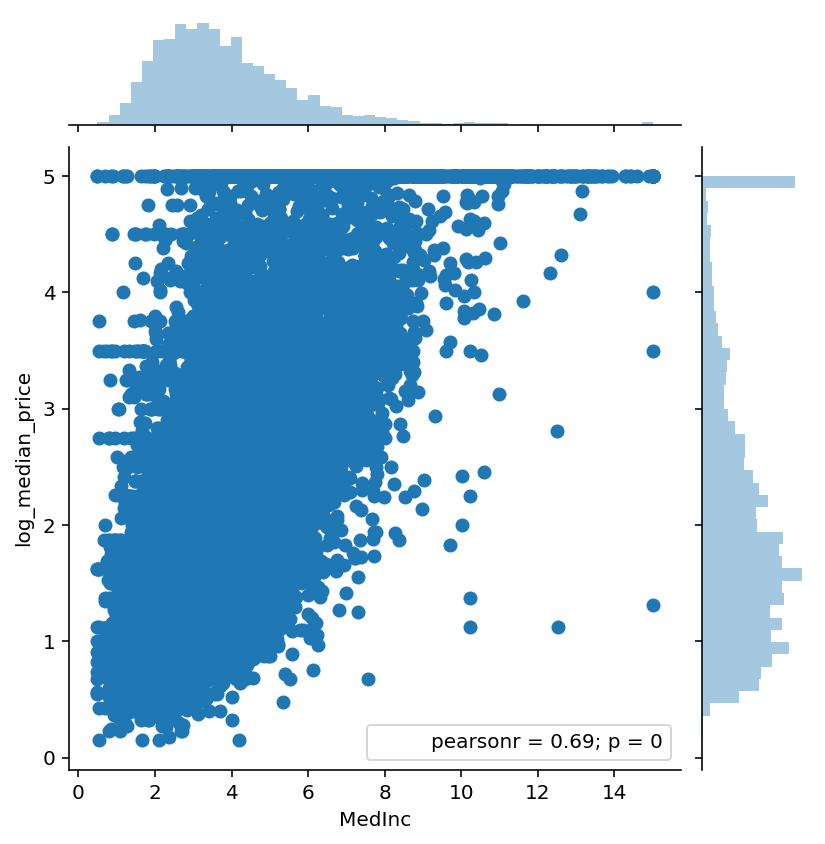

In [9]:
sns.jointplot("MedInc", "log_median_price", data=df)

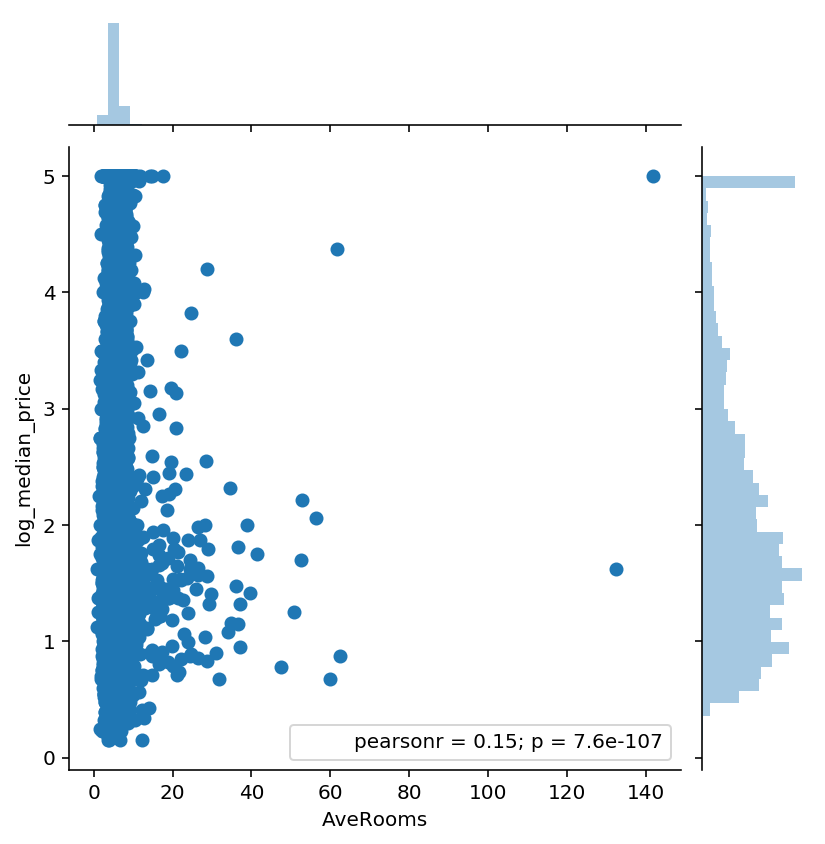

In [10]:
sns.jointplot("AveRooms", "log_median_price", data=df)

## Decision Tree with scikit-learn 

Decision Trees can be founded in the `tree` package of scikit-learn.

In [11]:
from sklearn import tree

We transform our labels into buckets.

In [12]:
from sklearn.preprocessing import binarize

y_2c = binarize(y.reshape(-1, 1), np.median(y)).reshape(-1)

In [13]:
clf = tree.DecisionTreeClassifier()

In [14]:
from sklearn.model_selection import cross_val_score

In [32]:
def do_cv_experiment(clf_to_score, X, y, k=5):
    scores = cross_val_score(clf_to_score, X, y_2c, scoring="roc_auc", cv=k, n_jobs=3)
    return np.mean(scores), np.std(scores)


mu, sigma = do_cv_experiment(clf, X, y_2c, 5)
print("%.4f (±%.4f) AUC" % (mu, sigma))

0.8394 (±0.0597) AUC


*Exercises* (do what you'd like): 
1. Write a parameter search (or use GridSearchCV/RandomSearch) to find good parameters for the DT.
2. Increase the number of bins.
3. Try the regression-typed problem.

In [16]:
# %load solutions/dt_intro_1.py

In [17]:
# %load solutions/dt_intro_3.py

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(n_estimators=100, max_features=4)

In [26]:
%%time
mu, sigma = do_cv_experiment(clf, X, y_2c, 5)
print("%.4f (±%.4f) AUC" % (mu, sigma))

0.8431 (±0.0703) AUC
CPU times: user 84.9 ms, sys: 29.2 ms, total: 114 ms
Wall time: 8.7 s


In [27]:
clf = RandomForestClassifier(n_estimators=100, 
                             max_features=4, 
                             n_jobs=-1)

$$ \mu, \sigma $$

In [28]:
%%time
mu, sigma = do_cv_experiment(clf, X, y_2c, 5)
print("%.4f (±%.4f) AUC" % (mu, sigma))

0.8431 (±0.0703) AUC
CPU times: user 83.5 ms, sys: 31.3 ms, total: 115 ms
Wall time: 7.19 s


In [34]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42)

params = {
    "n_estimators": [5, 25, 100],
    "criterion": ("entropy", "gini"),
    "max_depth": (None, 2, 3, 4),
    "max_features": (2, 3, 4)
}

grid_clf = GridSearchCV(clf, params, scoring="roc_auc", cv=5, n_jobs=-1)
#mu, sigma = do_cv_experiment(grid_clf, X, y_2c, 4)
#print("%.4f (±%.4f) AUC" % (mu, sigma))

grid_clf.fit(X, y_2c)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': (None, 2, 3, 4), 'criterion': ('entropy', 'gini'), 'max_features': (2, 3, 4), 'n_estimators': [5, 25, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [35]:
grid_clf.best_score_

0.8700038312759929

In [36]:
grid_clf.cv_results_

/Users/uberwach/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/uberwach/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/uberwach/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_arg

{'mean_fit_time': array([ 0.20281487,  1.0157196 ,  4.30448542,  0.3571754 ,  1.48723545,
         5.77653227,  0.36253796,  1.8175066 ,  7.10208735,  0.05244417,
         0.25268426,  1.00850163,  0.07504697,  0.33340645,  1.30683441,
         0.09118299,  0.40791001,  1.60955477,  0.07020206,  0.33528123,
         1.32493939,  0.0966558 ,  0.43656697,  1.89917707,  0.19526162,
         0.80121179,  2.4352468 ,  0.08595715,  0.41808519,  1.64126663,
         0.11742039,  0.56866961,  2.1951828 ,  0.1429472 ,  0.70082064,
         2.84496784,  0.1700274 ,  0.80862103,  3.26471276,  0.230091  ,
         1.10565085,  4.42976561,  0.28583622,  1.42170706,  5.62806025,
         0.04758739,  0.21987786,  0.86775784,  0.06320162,  0.27238283,
         1.08678041,  0.0729404 ,  0.35159416,  1.33112497,  0.05974002,
         0.28322763,  1.11674538,  0.08163261,  0.36684322,  1.42992296,
         0.09271512,  0.45259652,  1.80301614,  0.07146411,  0.33729305,
         1.35055499,  0.09556241, 

In [37]:
grid_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 2,
 'n_estimators': 100}

In [40]:
best_clf = grid_clf.best_estimator_
best_clf.fit(X, y_2c)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
from sklearn.externals import joblib

In [42]:
joblib.dump(best_clf, "best_forest_grid_v1", compress=3)

['best_forest_grid_v1']

In [43]:
loaded_model = joblib.load("best_forest_grid_v1")

In [44]:
loaded_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
loaded_model.predict_proba(X)[:, 1]

array([ 0.90933691,  0.88896757,  0.9221388 , ...,  0.1349916 ,
        0.14364   ,  0.11921864])